## Decision Trees: Regression

In this notebook, we will learn how to calculate and pick the best split for a given node, use *sklearn*'s ability to visualize, and then prune, decision trees. We will start with the decision tree we started in the lecture so you can compare your calculations to those of sklearn. 

Note that visualizing trees is really only going to make sense for fairly small datasets, or if you use various ways to limit the size of the tree. 

In [8]:
from sklearn.tree import DecisionTreeRegressor  # code to create a decision tree for regression
from sklearn import tree                        # code to visualize a decision tree
import matplotlib.pyplot as plt                 # needed to draw the nodes and branches
import pandas as pd      
import numpy as np

Now let's create the same data that we used in the lecture and store that in a *Pandas* dataframe:

In [2]:
x = [1.5, 1., 2., 3., 2.5]
y = [1, 1.5, 2.5, 2.5, 3.]

df = pd.DataFrame({'x':x , "y":y})
df

,x,y
0,1.5,1.0
1,1.0,1.5
2,2.0,2.5
3,3.0,2.5
4,2.5,3.0


### Manually calculate best split

In [3]:
df.sort_values(by='x')

,x,y
1,1.0,1.5
0,1.5,1.0
2,2.0,2.5
4,2.5,3.0
3,3.0,2.5


In [10]:
splits = [1.25, 1.75, 2.25, 2.75]
y_avg = np.mean(df['y'])
y_avg

2.1

In [13]:
root_err = np.mean((df['y'] - y_avg)**2)
root_err

0.54

# Split 1
x >= 1.25

In [28]:
#false
#(x = 1, y = 1.5)
avg_f = 1.5
mse_f = np.mean((1.5 - 1.5)**2)
mse_f

#True
(1.5, 1.0), (2.0, 2.5), (2.5, 3.0), (3.0, 2.5)
avg_T = (1+2.5+3+2.5)/4
avg_T
mse_T = ((1-2.25)**2 + (2.5-2.25)**2 + (3-2.25)**2 + (2.5-2.25)**2)/4
print("avg:",avg_T, "mse:",mse_T)

avg: 2.25 mse: 0.5625


In [30]:
mse_after_1_split = (1/5)*mse_f + (4/5)*mse_T
mse_after_1_split

0.45

# Split 2
x >= 1.75

In [49]:
# False
#(1, 1.5), (1.5, 1)
avg_f = (1+1.5)/2
avg_f
mse_f = np.mean((1 - 1.25)**2 + (1.5 - 1.25)**2)
mse_f

#True
(2.0, 2.5), (2.5, 3.0), (3.0, 2.5)
avg_T = (2.5+3+2.5)/3
avg_T
mse_T = ((2.5-2.66)**2 + (3-2.66)**2 + (2.5-2.66)**2)/3
print("avg:",avg_f, "mse:",mse_f)
print("avg:",avg_T, "mse:",mse_T)

avg: 1.25 mse: 0.125
avg: 2.6666666666666665 mse: 0.05559999999999999


In [41]:
mse_after_2_split = (2/5)*mse_f + (3/5)*mse_T
mse_after_2_split

0.058359999999999995

### Create and visualize tree

To train our decision tree model, we need to show it the *features* and the *answers*, so we will extract both of those from our dataframe:

In [42]:
X = df.drop('y', axis =1)   
y = df['y']                 

We now train our model by passing our data into it so that it can find all the proper split points to create the decision tree. 

In [43]:
regr = DecisionTreeRegressor(random_state=1234)  
model = regr.fit(X, y)                           

Now we plot the results.

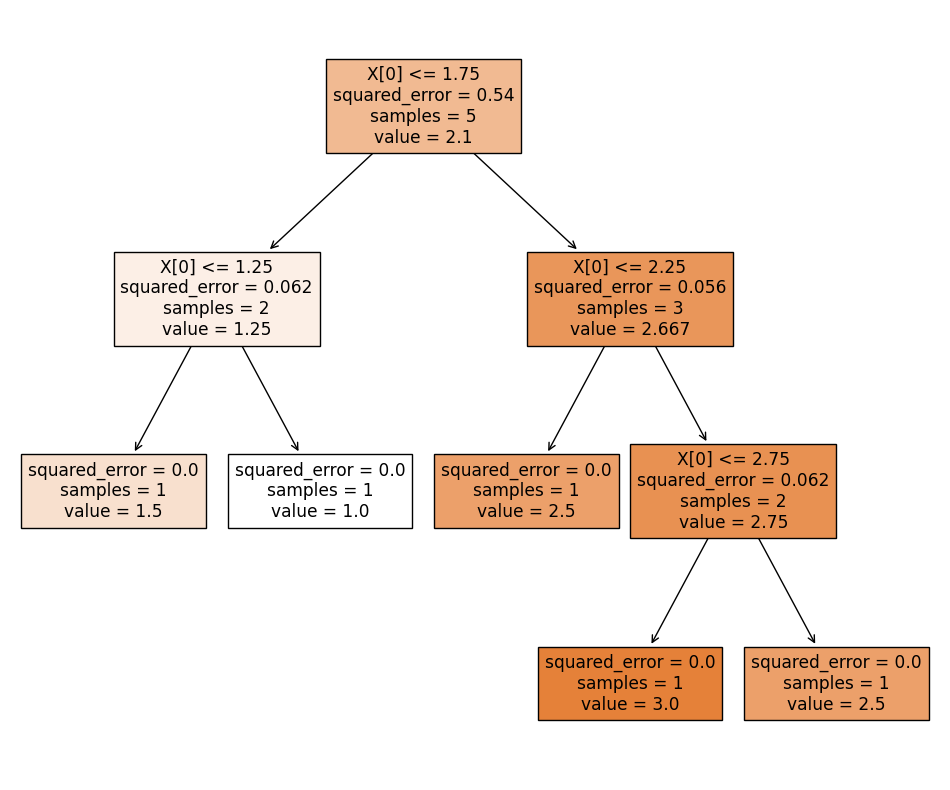

In [44]:
fig = plt.figure(figsize=(12,10))             # use this to adjust the size of the image
_ = tree.plot_tree(regr, filled=True)         # plots the decision tree (ignore the weird "_ =" at the beginning for now)

### Prune the Tree

We know that decision trees have a tendency to overfit. In our lecture we talked about a few ways we can try to stop a decision tree from overfitting (that is, stop it from expanding until there is one data point in each leaf node). In this section you will play around with some of these methods by adjusting some of the hyper-parameters of the tree: `max_depth`, `min_samples_split`, and `min_samples_leaf`.

Take a look at the documentation for [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) to familiarize yourself with how these parameters work. 

Now try using each one of these in the code below and compare the decision tree you get with the original one above. You should be able to clearly see which nodes were "pruned" from the tree. 

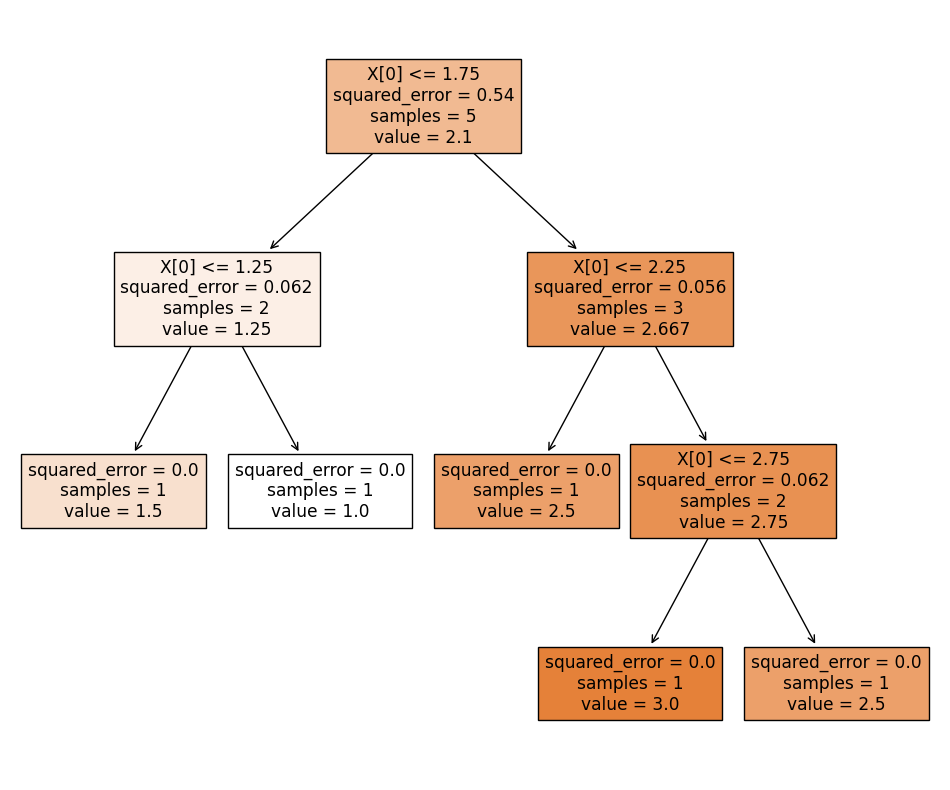

In [50]:
regr = DecisionTreeRegressor(random_state=1234)  
model = regr.fit(X, y)   

fig = plt.figure(figsize=(12,10))             
_ = tree.plot_tree(regr, filled=True)

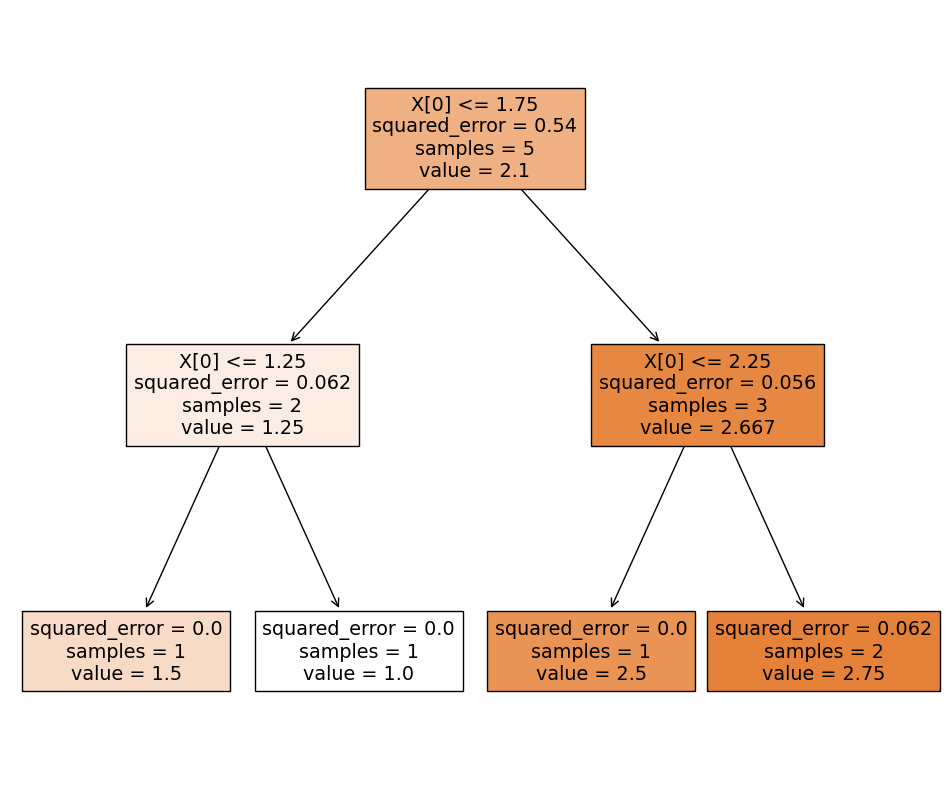

In [51]:
regr = DecisionTreeRegressor(max_depth = 2, random_state=1234)  
model = regr.fit(X, y)   

fig = plt.figure(figsize=(12,10))             
_ = tree.plot_tree(regr, filled=True)

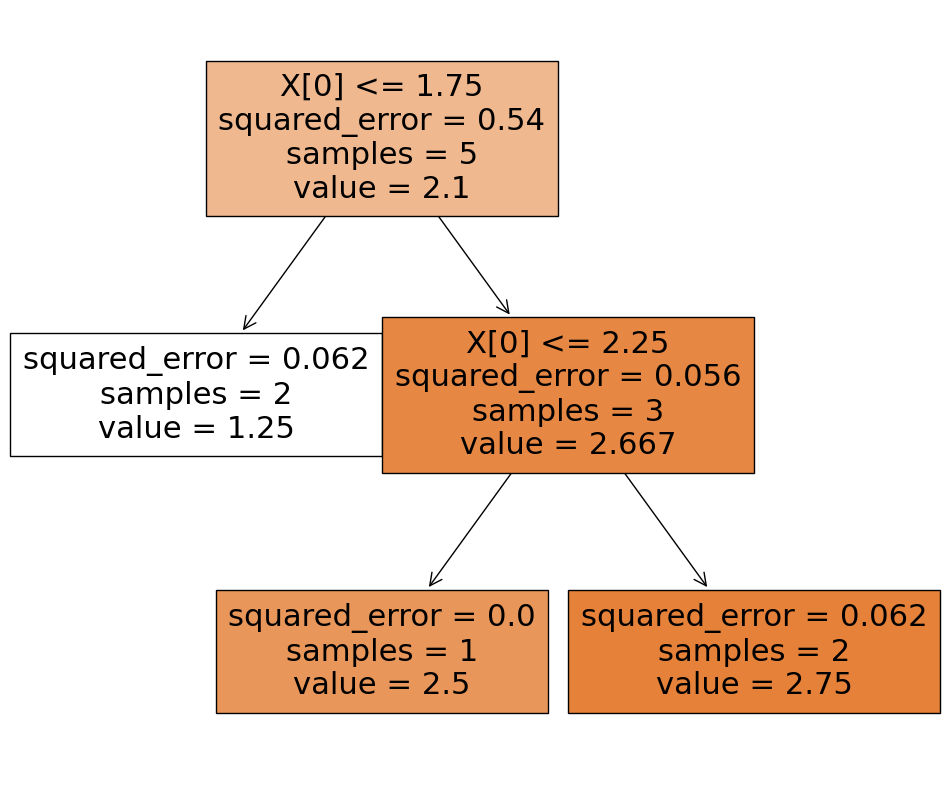

In [55]:
regr = DecisionTreeRegressor(min_samples_split = 3, random_state=1234)  
model = regr.fit(X, y)   

fig = plt.figure(figsize=(12,10))             
_ = tree.plot_tree(regr, filled=True)

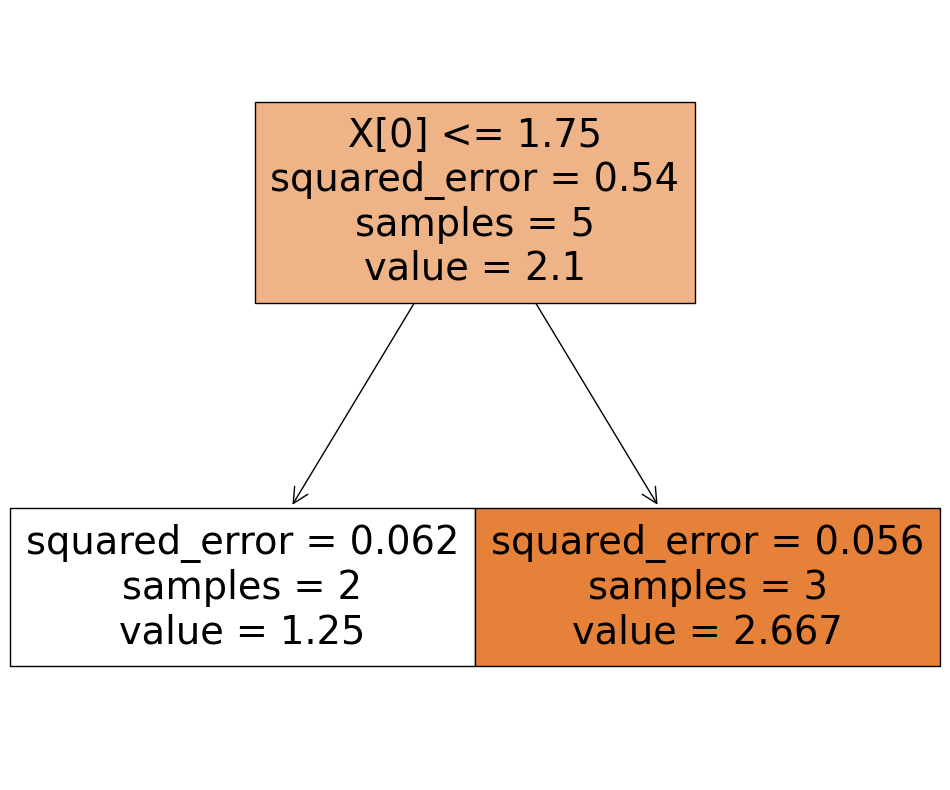

In [62]:
regr = DecisionTreeRegressor(min_samples_leaf = 2, random_state=1234)  
model = regr.fit(X, y)   

fig = plt.figure(figsize=(12,10))             
_ = tree.plot_tree(regr, filled=True)